<a href="https://colab.research.google.com/github/JCNRS-99/Angular-practise/blob/main/uber_rides_dataset_2016_analysis_update_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UBER Rides Dataset  ANALYSIS**

**Introduction**

*In this notebook we will analylize " My Uber Rides  dataset" and try to find the hidden relationships among Time( Date),  Miles , Purpose , start and end location, and categories. After that , we will predict the travel miles according to the starting time and places by using machine learning.
*

In [ ]:
# import relative python libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


My Uber Drives - 2016.csv



In [ ]:
# load dataset into Pandas
mydata = pd.read_csv('../input/My Uber Drives - 2016.csv')

**Firstly** , let's have a  look  at  this dataset.

In [ ]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
START_DATE*    1156 non-null object
END_DATE*      1155 non-null object
CATEGORY*      1155 non-null object
START*         1155 non-null object
STOP*          1155 non-null object
MILES*         1156 non-null float64
PURPOSE*       653 non-null object
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [ ]:
mydata.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
mydata.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [ ]:
mydata.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

* We can find that this dataset has seven columns ( START_DATE* , END_DATE*, CATEGORY* , START* , STOP* , MILES* , PURPOSE* )and totally 1156 rows . Another thing we shoule notice is that  there are a lot of missing values in PURPOSES*.If we want to get a good result,we need to fill the missing data.*

 *We also should notice that the last row is "Totals"  that is  unusage data, so we can delete this row.*

In [ ]:
# Copy a dataset
datacopy = mydata.copy()

In [ ]:
# delete the last line
datacopy = datacopy.drop(datacopy.index[1155])

**Secondly**,*Let's fill the missing values and cleanse the data.*

*In order to fill the missing values, let's look at  relationships between PURPOSE* and Time , MILES*

In [ ]:
# Change 'START_DATE*','END_DATE*' to time format
datacopy['START_DATE*'] = pd.to_datetime(datacopy['START_DATE*'])
datacopy['END_DATE*'] = pd.to_datetime(datacopy['END_DATE*'])

In [ ]:
# Extract 'Hour','Month','Day of Week','Date' from 'START_DATE*'
datacopy['Hour'] = datacopy['START_DATE*'].apply(lambda time: time.hour)
datacopy['Month'] = datacopy['START_DATE*'].apply(lambda time: time.month)
datacopy['Day of Week'] = datacopy['START_DATE*'].apply(lambda time: time.dayofweek)
datacopy['Date'] = datacopy['START_DATE*'].apply(lambda time: time.date())
datacopy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Month,Day of Week,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,1,5,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,2,2016-01-06


In [ ]:
# Convert 'Day of Week' from numerical to text(that we can understand)
daymap ={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
datacopy['Day of Week'] = datacopy['Day of Week'].map(daymap)
datacopy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Month,Day of Week,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,Fri,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,1,Sat,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,Sat,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,Tue,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,Wed,2016-01-06


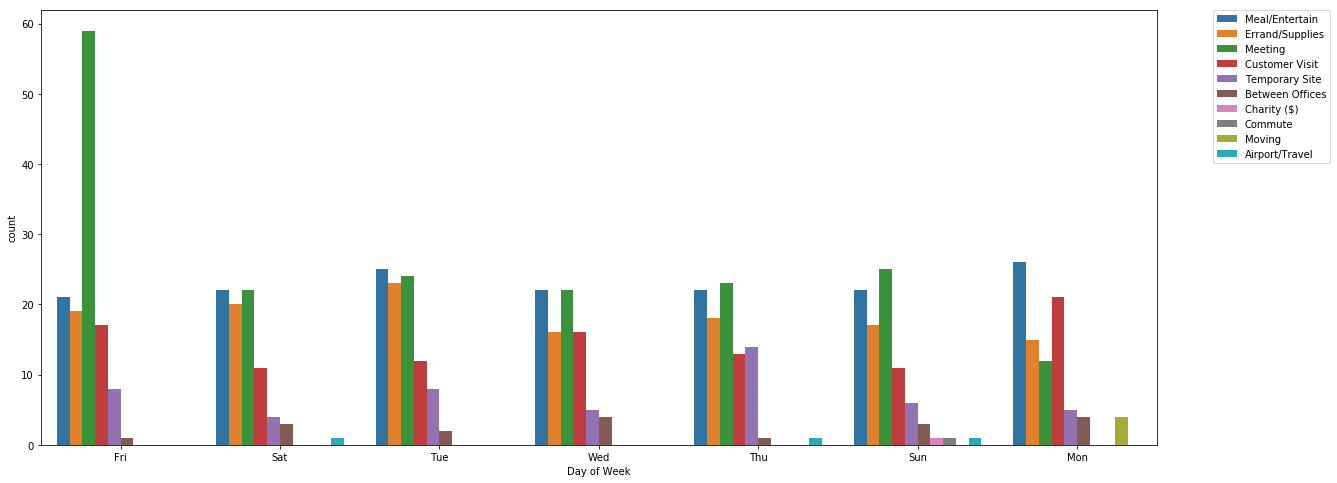

In [ ]:
# Try to find the hiden relationship between the missing value and 'Day of Week'
plt.figure(figsize=(20,8))
sns.countplot(x='Day of Week',data = datacopy,hue = 'PURPOSE*')
plt.legend(bbox_to_anchor = (1.05,1),loc=2,borderaxespad=0.)

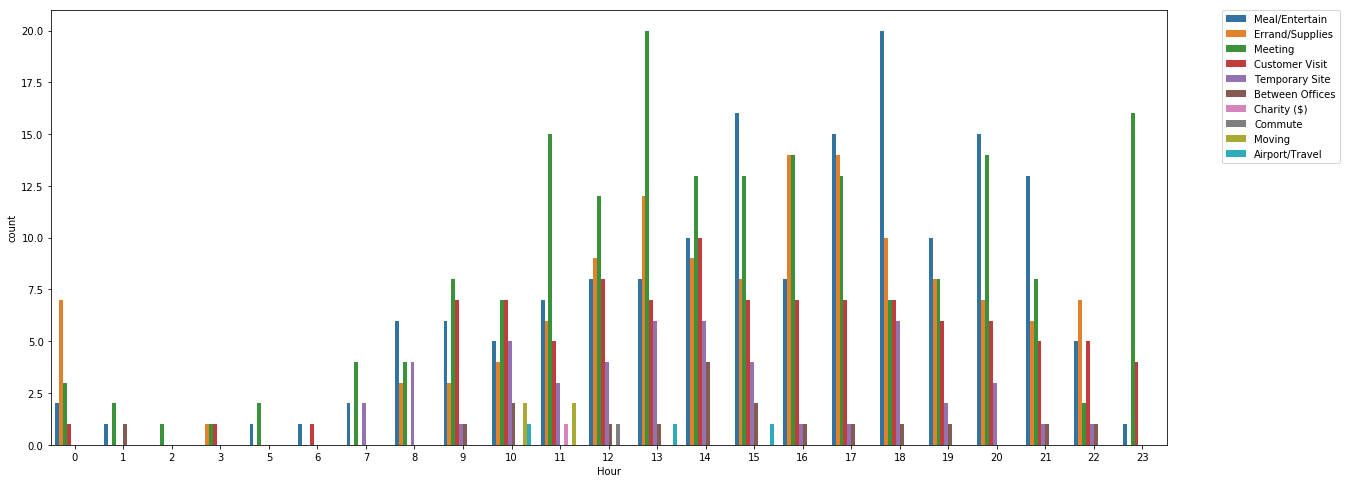

In [ ]:
# Try to find the hiden relationship between the missing value and day of 'Hour'
plt.figure(figsize=(20,8))
sns.countplot(x='Hour',data = datacopy,hue = 'PURPOSE*')
plt.legend(bbox_to_anchor = (1.05,1),loc=2,borderaxespad=0.)

In [ ]:
datacopy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Month,Day of Week,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,Fri,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,1,Sat,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,Sat,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,Tue,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,Wed,2016-01-06


*By the analysis before , we can find the correlation between Missing values and day of time . And then let's fill the missing value .  *

In [ ]:
datacopy['Hour'].unique()

array([21,  1, 20, 17, 14, 13,  8, 12, 15, 18, 19, 11, 16,  0,  9, 10, 23,
        3,  7,  5, 22,  6,  2])

In [ ]:
#Fill the missing value
datacopy[(datacopy['Hour'] >= 1) & (datacopy['Hour'] <= 14)] = datacopy[(datacopy.Hour >= 1) & (datacopy.Hour <= 14)].fillna({'PURPOSE*':'Meeting'})
datacopy[(datacopy['Hour'] >= 15) & (datacopy['Hour'] <= 21)] = datacopy[(datacopy['Hour'] >= 15) & (datacopy['Hour'] <= 21)].fillna({'PURPOSE*':'Meal/Entertain'})
datacopy[(datacopy['Hour'] >= 22) | (datacopy['Hour'] == 0)] = datacopy[(datacopy['Hour'] >= 22) | (datacopy['Hour'] == 0 )].fillna({'PURPOSE*':'Meeting'})
#datacopy[(datacopy['Hour'] == 0)] = datacopy[(datacopy['Hour'] == 0)].fillna({'PURPOSE*':'Meeting'})


In [ ]:
datacopy.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
Hour           0
Month          0
Day of Week    0
Date           0
dtype: int64

**Then**, *let's go finding the hiden patterns.*

*At first, we will check every column respectively ,and then  go  finding  their corelation.*

*1.  MILES*

*We can divide the MILES* data to 5 sets ("<=5","5-10","10-15","15-20",">20") according to different distence ,and then find their travel  frequence of each set.*

Miles:
 <=5      502
5-10     338
10-15    161
>20       83
15-20     71
dtype: int64


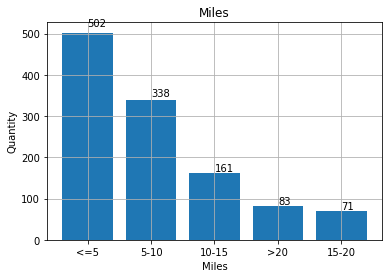

In [ ]:
ml_dis=datacopy["MILES*"]
ml_range_lst=["<=5","5-10","10-15","15-20",">20"]
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))
ml_dic=dict()
for item in ml_range_lst:
    ml_dic[item]=0
for mile in ml_dis.values:
    if mile<=5:
        ml_dic["<=5"]+=1
    elif mile<=10:
        ml_dic["5-10"]+=1
    elif mile<=15:
        ml_dic["10-15"]+=1
    elif mile<=20:
        ml_dic["15-20"]+=1
    else:
        ml_dic[">20"]+=1
ml_dis=pd.Series(ml_dic)
ml_dis.sort_values(inplace=True,ascending=False)
print("Miles:\n",ml_dis)
#figure
rects=plt.bar(range(1,len(ml_dis.index)+1),ml_dis.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Quantity")
plt.xticks(range(1,len(ml_dis.index)+1),ml_dis.index)
plt.grid()
autolabel(rects)
plt.savefig("./ml_dis_fig")

*We can find that there is a decreasing trends. The largest number is 502(<=5 miles), following by 338(5 - 10 miles)、161( 10- 15 miles).And most of the travelling distence is less than 15 miles.*

*2.  PURPOSE:*


In [ ]:
datacopy['PURPOSE*'].value_counts()

Meeting            436
Meal/Entertain     413
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

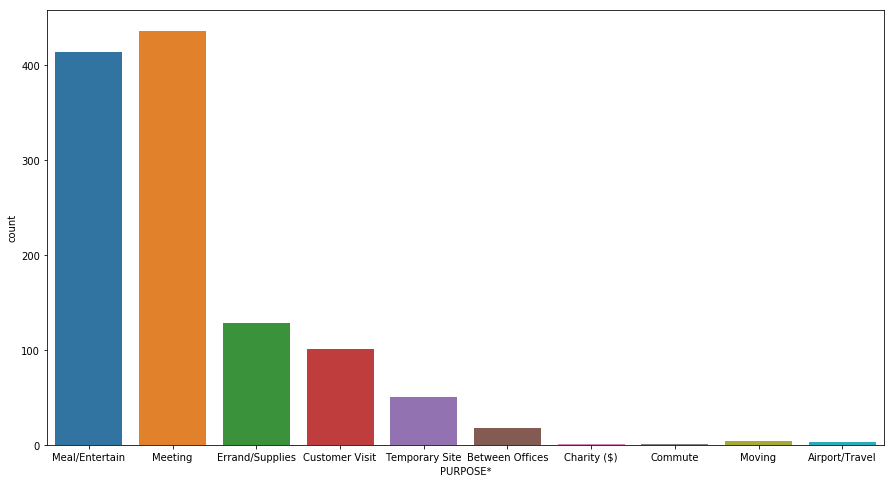

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(datacopy['PURPOSE*'])

In [ ]:
# Combine 'Charity ($)','Commute','Moving','Airport/Travel' into 'Others'
dp = datacopy
dp.replace(['Charity ($)', 'Commute','Moving','Airport/Travel'],'Others',inplace = True)

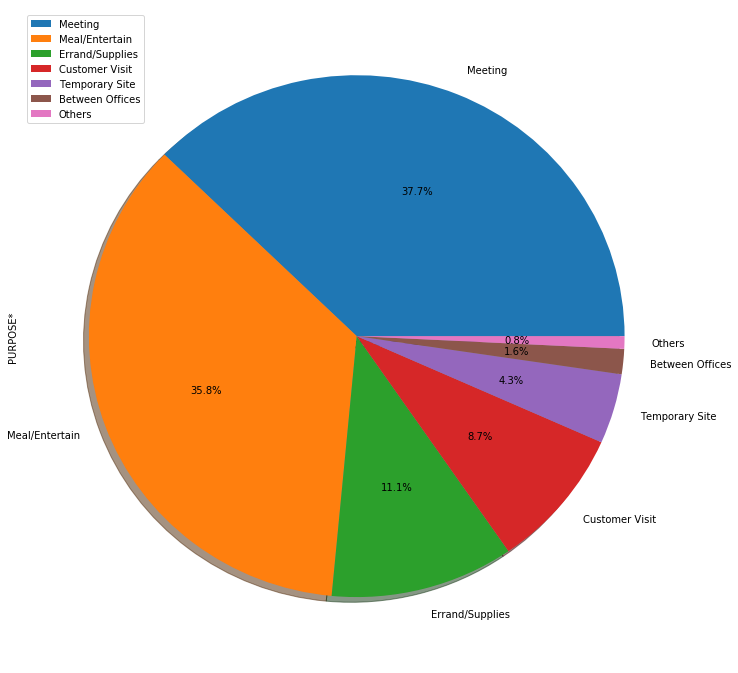

In [ ]:
plt.figure(figsize=(12,12))
dp['PURPOSE*'].value_counts()[:11].plot(kind='pie',autopct='%1.1f%%',shadow=True,legend = True)
plt.show()

*From the table before we can find that  'Meeting' and 'MealEntertain'  occupy  more than 73%  following by 'Errand/Supplies' (11.1%) and 'Customer Visit' (8.7%).  *

* *3. [ CTEGORY]**
***Let's see what happend in  CTEGORY*.**

In [ ]:
datacopy['CATEGORY*'].value_counts()

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

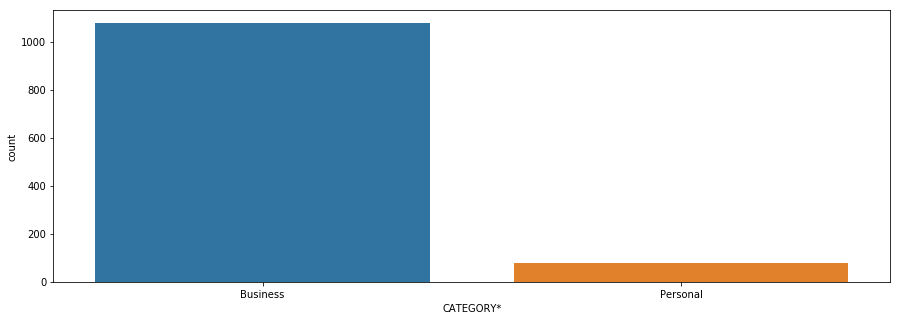

In [ ]:
#plot 
plt.figure(figsize=(15,5))
sns.countplot(datacopy['CATEGORY*'])

We can find  the number of "business" is far lager than "personal", respectively 1078, 77.


*4.  Start_Date & End_Date*

*Monthly:*

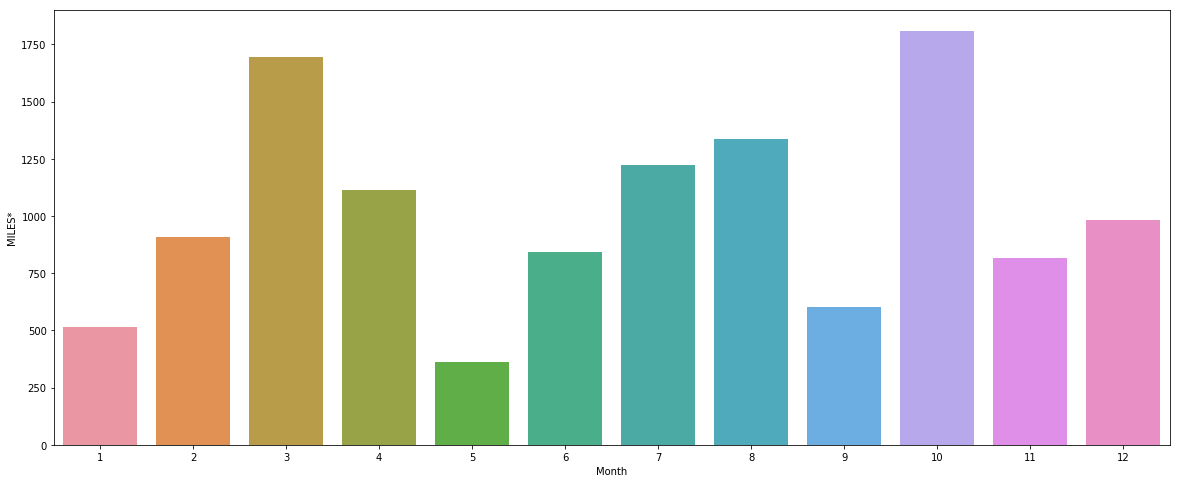

In [ ]:
per_month =pd.DataFrame()
per_month =datacopy.groupby('Month').sum()
plt.figure(figsize=(20,8))
sns.barplot(x='Month',y='MILES*',data=per_month.reset_index())

*December has the lagerst number 146. In contast, september is lowest, and the figure is 36.And the January,April, May are also a little lower than other moths.*

*5.  Start_Time & End_Time*

*Hourly*

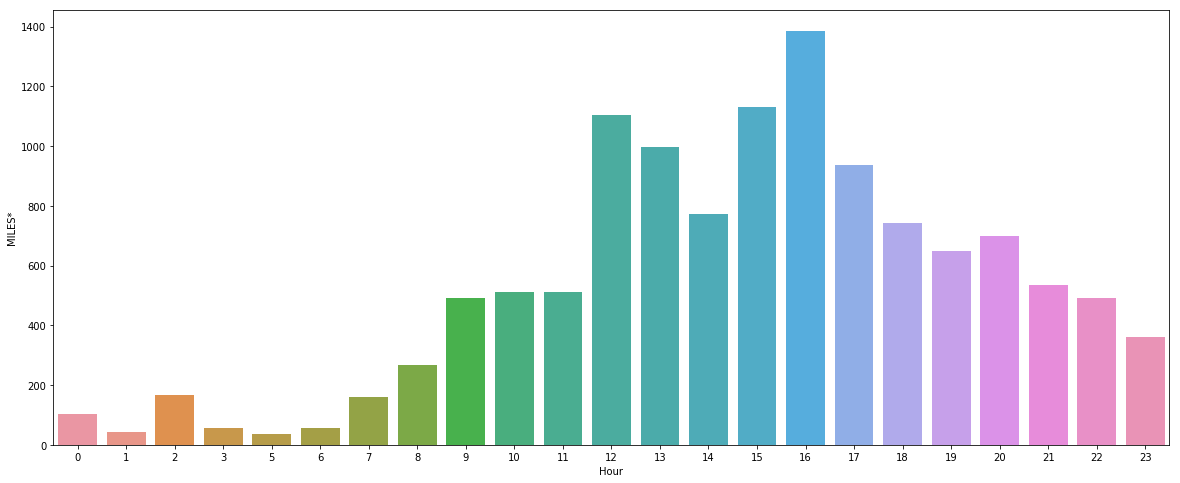

In [ ]:
ByHour =pd.DataFrame()
ByHour =datacopy.groupby('Hour').sum()
plt.figure(figsize=(20,8))
sns.barplot(x='Hour',y='MILES*',data=ByHour.reset_index())

**Next***, let's look for  their association relationship !*

**1.   The relationship between Purpose and Miles.**

In [ ]:
Pur_Mil = datacopy.groupby('PURPOSE*')['MILES*'].sum()
Pur_Mil

PURPOSE*
Between Offices     197.0
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain     3776.9
Meeting            4879.6
Others              230.0
Temporary Site      523.7
Name: MILES*, dtype: float64

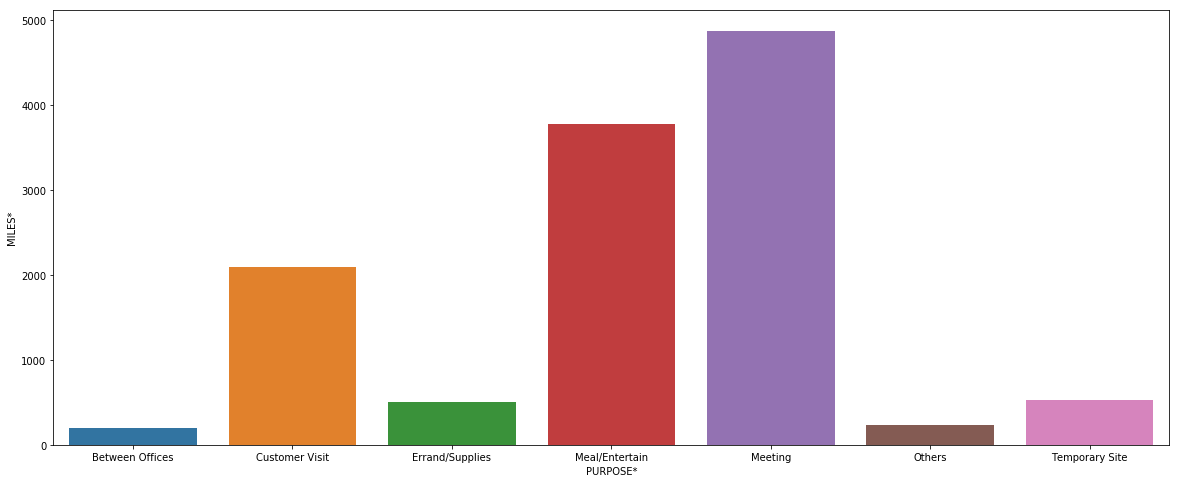

In [ ]:

plt.figure(figsize=(20,8))
sns.barplot(x='PURPOSE*',y='MILES*',data=Pur_Mil.reset_index())

In [ ]:
CAT_Mil_Mean = datacopy.groupby('PURPOSE*').mean()
CAT_Mil_Mean

,MILES*,Hour,Month
PURPOSE*,,,
Between Offices,10.944444,14.111111,6.722222
Customer Visit,20.688119,15.118812,6.603960
Errand/Supplies,3.968750,14.718750,7.015625
Meal/Entertain,9.145036,16.690073,7.203390
Meeting,11.191743,12.896789,6.908257
Others,25.555556,11.444444,8.222222
Temporary Site,10.474000,13.800000,6.360000


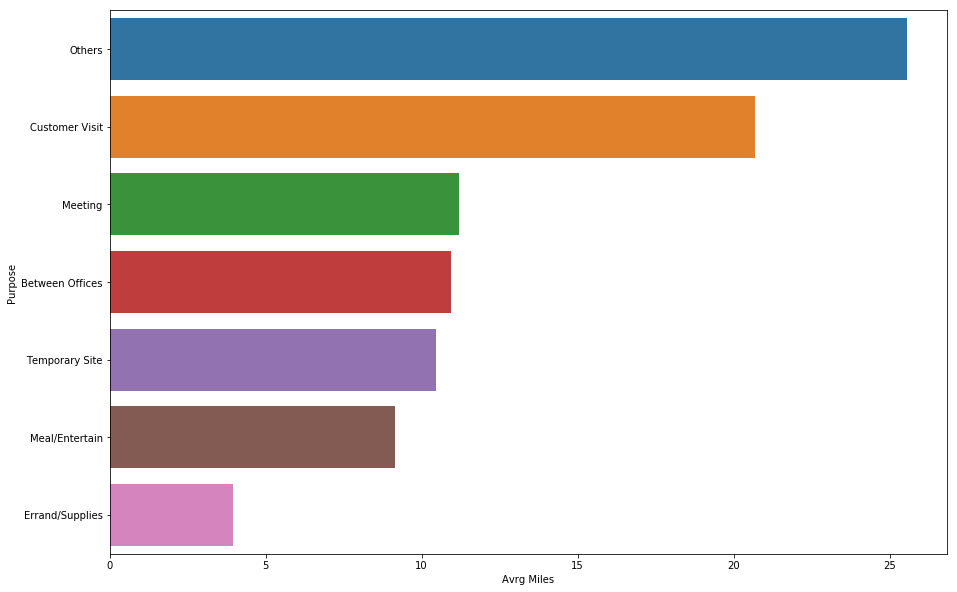

In [ ]:
plt.figure(figsize=(15,10))
CAT_Mil_Mean['PURPOSE*']=CAT_Mil_Mean.index.tolist()
ax = sns.barplot(x='MILES*',y='PURPOSE*',data=CAT_Mil_Mean ,order=CAT_Mil_Mean.sort_values('MILES*',ascending=False)['PURPOSE*'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

**2.   The relationship between Start Date and Miles.**

A.  Total Miles Per  Month

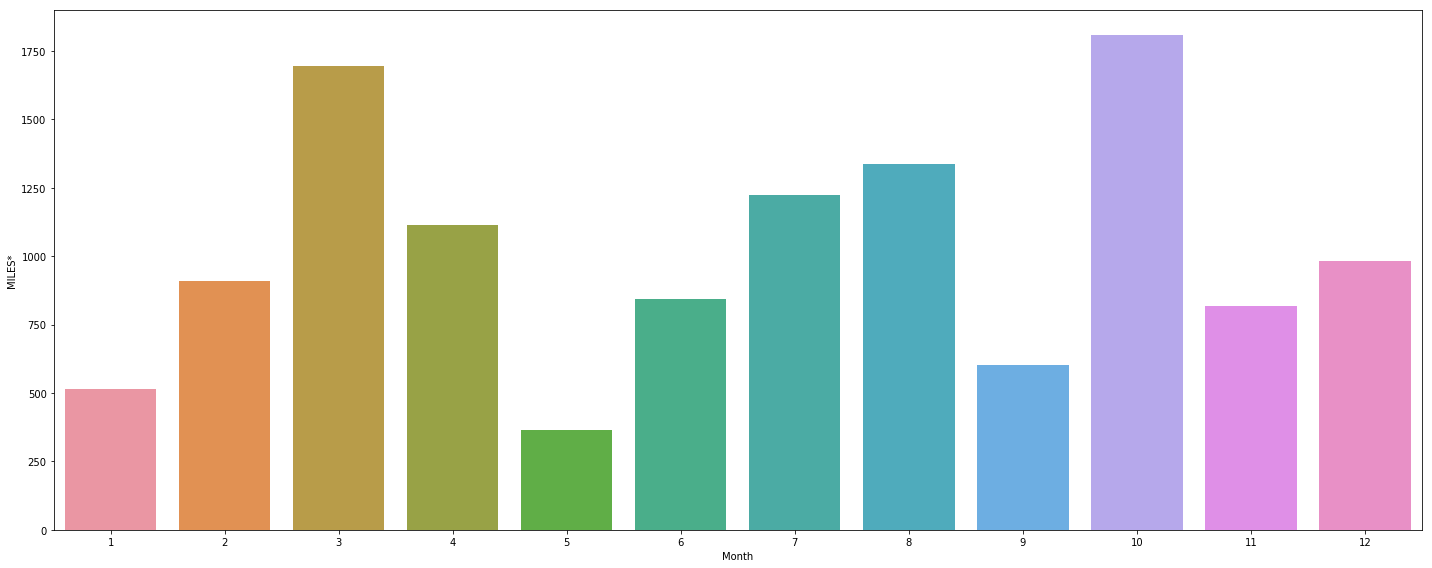

In [ ]:
MilPurMon = datacopy.groupby('Month')['MILES*'].sum()

plt.figure(figsize=(20,8))
sns.barplot(x='Month',y='MILES*',data=MilPurMon.reset_index())
plt.tight_layout()

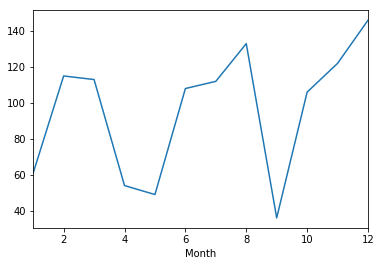

In [ ]:
MilPurMon = datacopy.groupby('Month').count()['MILES*'].plot()

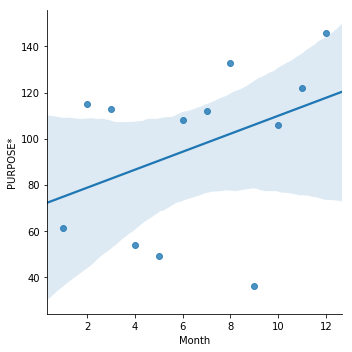

In [ ]:
#Month purpose regression
sns.lmplot(x='Month',y='PURPOSE*',data=datacopy.groupby('Month').count().reset_index())

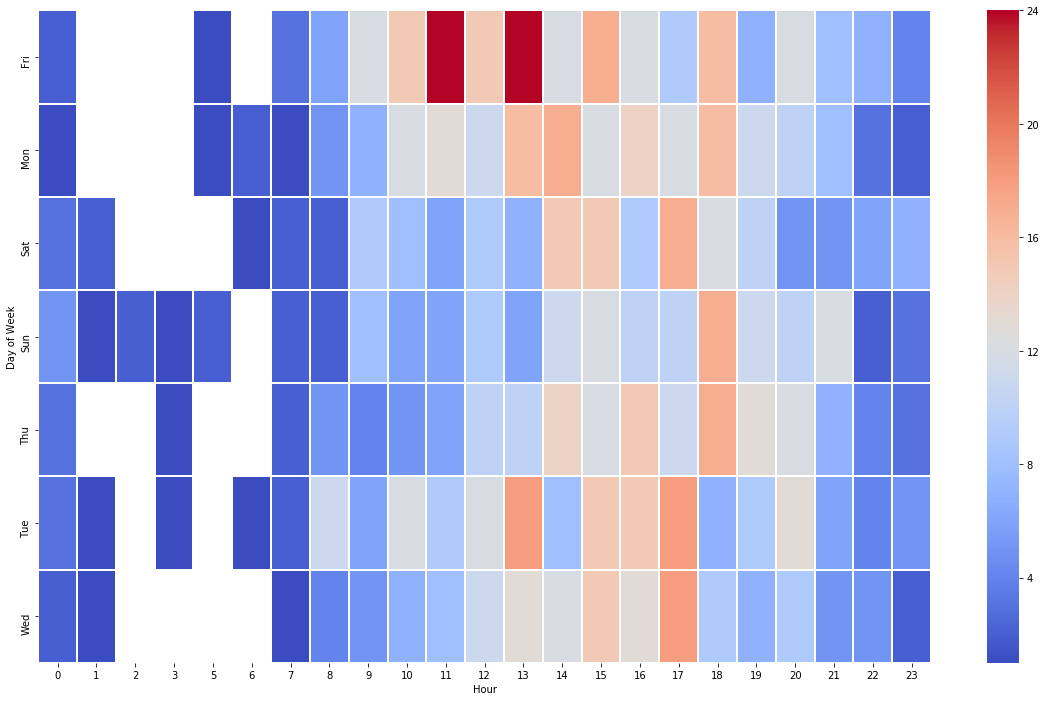

In [ ]:
#Heatmap
dayHour = datacopy.groupby(by=['Day of Week','Hour']).count()['PURPOSE*'].unstack()
plt.figure(figsize=(20,12))
sns.heatmap(dayHour,cmap='coolwarm',linecolor='white',linewidth=1)

**3.   The relationship between CATEGORY and Miles.**

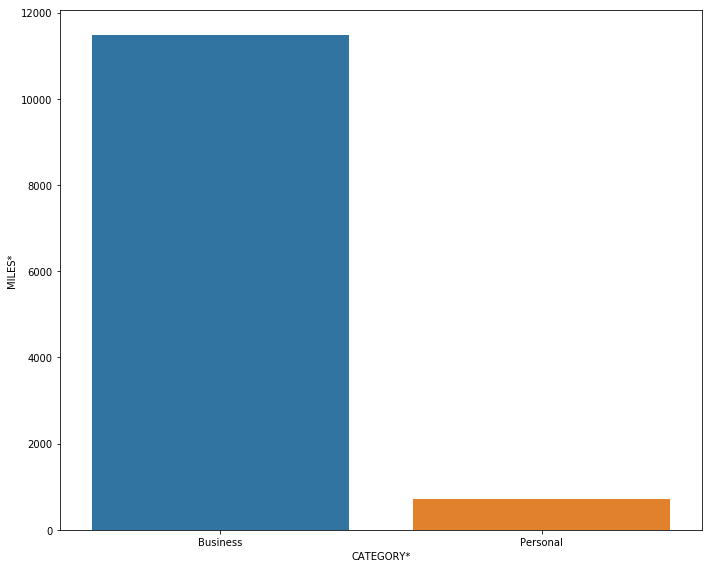

In [ ]:
CAT_Mil_SUM = datacopy.groupby('CATEGORY*').sum()
plt.figure(figsize=(10,8))
sns.barplot(x='CATEGORY*',y='MILES*',data=CAT_Mil_SUM.reset_index())
plt.tight_layout()

**In the end** *, let's have a look at  " Velocity" !*

In [ ]:
datacopy["END_DATE*"]=pd.to_datetime(datacopy["END_DATE*"],format="%m/%d/%Y %H:%M")
speed=datacopy["MILES*"]/((datacopy["END_DATE*"]-datacopy["START_DATE*"]).dt.seconds/60)
#print(speed)

In [ ]:
datacopy["SPEED*"]=speed
datacopy["START_HOUR*"]=datacopy["START_DATE*"].dt.hour
spd_df=datacopy[datacopy["SPEED*"]!=np.inf].groupby(["START_HOUR*"])["SPEED*"].mean()
datacopy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Month,Day of Week,Date,SPEED*,START_HOUR*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,Fri,2016-01-01,0.850000,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1,1,Sat,2016-01-02,0.416667,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,Sat,2016-01-02,0.369231,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,Tue,2016-01-05,0.335714,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,Wed,2016-01-06,0.950746,14


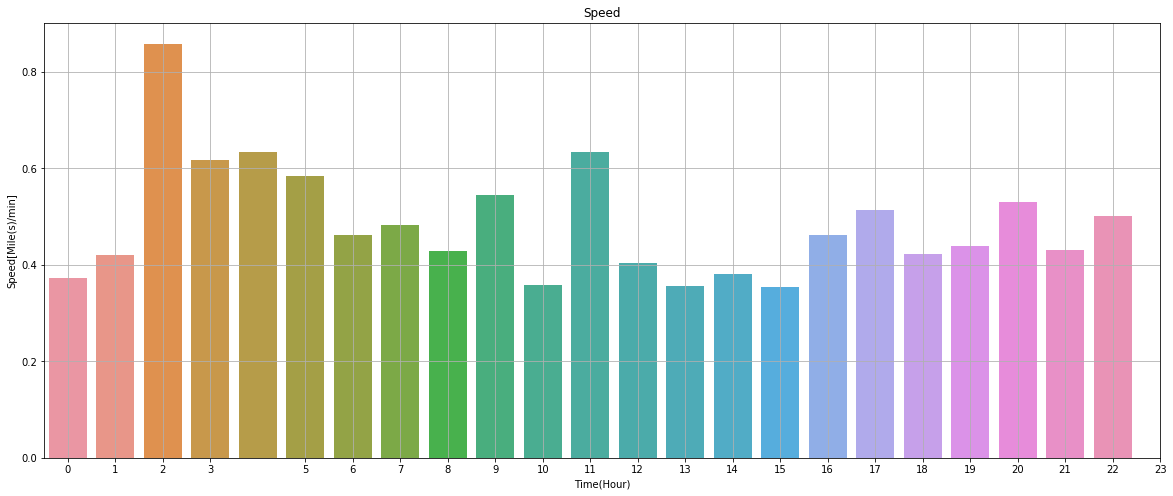

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x="START_HOUR*",y="SPEED*",data=spd_df.reset_index())
plt.title("Speed")
plt.xlabel("Time(Hour)")
plt.ylabel("Speed[Mile(s)/min]")
plt.xticks(spd_df.index)
plt.grid()

**Conclusion:**

From our analysis , we can find that  travaling for business is far more than for personal reasons. And car speed at 2:00 AM is much higher than other  day of time.  We also can know that  this person in March and October has the longest travelling distance. The 'Communte' has the largest number among all the travelling purpose. From' Hour' diagram, we can find most of the traveling happened after 9 :00 AM. ' Meal/Entertainment ' and 'Meeting'  occupy more than 73% . 